In [1]:
# Here, Z is converted into solar units:
#     Z_sim is in mass fraction units
#     Z_arr = Z_sim/0.02
#     kappa = 1000*m_p*Z_arr  --> in n_LW & n_LW_ss
#     denominator = CC * Z * n_H  --> in X_H2
#     n_CO = 1e-4*n_H*X_CO*Z_arr

In [2]:
%%time
import timing
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as cm
import pynbody
from michaels_functions import center_and_r_vir, remove_bulk_velocity
from matplotlib.colors import LogNorm
from matplotlib.pyplot import figure

0:00:00.401 - Start Program

CPU times: user 545 ms, sys: 172 ms, total: 717 ms
Wall time: 782 ms


In [3]:
%%time
path = "bulk1/data_2/hydro_59/output/"
data = pynbody.load(path + "output_00050")

aexp = data.properties['a']
data.physical_units()
r_vir = center_and_r_vir(data, aexp, path)
remove_bulk_velocity(data)
r_e = 0.1 * r_vir
sph_5 = pynbody.filt.Sphere(radius = '5.0 kpc') # %(r_e*1.4))
region = data[sph_5]
f = open(data.filename + "/info_"+data.filename[-5:]+".txt","r")
lines = f.readlines()
f.close()

for line in lines:
    if line[0:13]=="unit_l      =":
        print line[:-1]
        unit_l = float(line[14:-1])
    if line[0:13]=="unit_d      =":
        print line[:-1]
        unit_d = float(line[14:-1])
    if line[0:13]=="unit_t      =":
        print line[:-1]
        unit_t = float(line[14:-1])
    if line[0:13]=="omega_b     =":
        print line[:-1]
        omega_b = float(line[14:-1])

('shifting on Stars:', SimArray([ 0.00308878, -0.03302971, -0.04676732], 'kpc'))
('virial radius:', SimArray(152.40432611, 'kpc'))
omega_b     =  0.450000017881393E-01
unit_l      =  0.682025380323961E+26
unit_d      =  0.123367583719985E-28
unit_t      =  0.163687521954501E+18
CPU times: user 23.2 s, sys: 19.1 s, total: 42.3 s
Wall time: 47.6 s


In [4]:
%%time
X_H2_bar = np.load('outputs/3.5/X_H2_bar_3.5.npy')
X_CO_bar = np.load('outputs/3.5/X_CO_bar_3.5.npy')
n_H_mean_arr = np.load('outputs/3.5/n_H_mean_arr_3.5.npy')
mach_no_arr = np.load('outputs/3.5/mach_no_arr_3.5.npy')
Z_arr = np.load('outputs/3.5/Z_arr_3.5.npy')

CPU times: user 2.19 ms, sys: 5.77 ms, total: 7.96 ms
Wall time: 6.98 ms


In [5]:
%%time
min_H = np.min(X_H2_bar)
max_H = np.max(X_H2_bar)
min_C = np.min(X_CO_bar)
max_C = np.max(X_CO_bar)
min_n = np.log10(np.min(n_H_mean_arr))
max_n = np.log10(np.max(n_H_mean_arr))
min_M = np.min(mach_no_arr)
max_M = np.max(mach_no_arr)
min_Z = np.min(Z_arr)
max_Z = np.max(Z_arr)

CPU times: user 2.42 ms, sys: 0 ns, total: 2.42 ms
Wall time: 1.66 ms


In [6]:
%%time
region.gas["X_H2_bar"] = X_H2_bar
region.gas["X_CO_bar"] = X_CO_bar
region.gas["n_H_mean_arr"] = n_H_mean_arr
region.gas["mach_no_arr"] = mach_no_arr
region.gas["Z_arr"] = Z_arr

CPU times: user 12.1 ms, sys: 568 ms, total: 580 ms
Wall time: 591 ms


/home/cluster/mkrets/anaconda2/lib/python2.7/site-packages/pynbody-0.47-py2.7-linux-x86_64.egg/pynbody/snapshot/__init__.py:1443: RuntimeWarning: Conjoining derived and non-derived arrays. Assuming result is non-derived, so no further updates will be made.
  "Conjoining derived and non-derived arrays. Assuming result is non-derived, so no further updates will be made.", RuntimeWarning)
/net/cephfs/home/mkrets/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in divide
  
/home/cluster/mkrets/anaconda2/lib/python2.7/site-packages/matplotlib/colors.py:1031: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


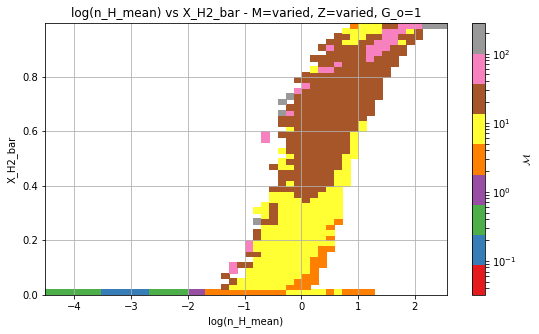

CPU times: user 3.77 s, sys: 880 ms, total: 4.65 s
Wall time: 4.57 s


In [7]:
%%time
plt.figure(figsize=(9,5))
histX_H2_M_mass, yedges, xedges = np.histogram2d(X_H2_bar, np.log10(n_H_mean_arr),
                               weights=mach_no_arr * region.gas["mass"], bins=50 , range=[[min_H,max_H],[min_n,max_n]])
histX_H2_mass, yedges, xedges = np.histogram2d(X_H2_bar, np.log10(n_H_mean_arr),
                               weights=region.gas["mass"], bins=50 , range=[[min_H,max_H],[min_n,max_n]])

yX_H2_M, xX_H2_M = yedges, xedges
plt.pcolormesh(xedges, yedges, histX_H2_M_mass/histX_H2_mass, norm=LogNorm(), vmin=min_M, vmax=max_M, cmap='Set1')
plt.colorbar(label=r"$\mathcal{M}$")
plt.xlabel('log(n_H_mean)')
plt.ylabel('X_H2_bar')
plt.grid(b=True, which='both', axis='both')
plt.title('log(n_H_mean) vs X_H2_bar - M=varied, Z=varied, G_o=1')
plt.savefig('outputs/3.5/Hist-X_H2_bar-n_H_mean-3.5.png', dpi=300, bbox_inches='tight')
plt.show()


/net/cephfs/home/mkrets/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in divide
  


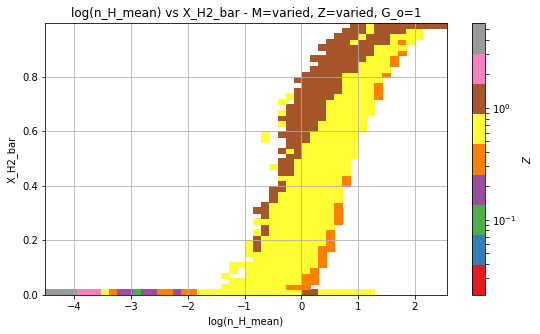

CPU times: user 919 ms, sys: 23.5 ms, total: 943 ms
Wall time: 931 ms


In [8]:
%%time
plt.figure(figsize=(9,5))
histX_H2_M_mass, yedges, xedges = np.histogram2d(X_H2_bar, np.log10(n_H_mean_arr),
                               weights=Z_arr * region.gas["mass"], bins=50 , range=[[min_H,max_H],[min_n,max_n]])
histX_H2_mass, yedges, xedges = np.histogram2d(X_H2_bar, np.log10(n_H_mean_arr),
                               weights=region.gas["mass"], bins=50 , range=[[min_H,max_H],[min_n,max_n]])

yX_H2_Z, xX_H2_Z = yedges, xedges
plt.pcolormesh(xedges, yedges, histX_H2_M_mass/histX_H2_mass, norm=LogNorm(), vmin=min_Z, vmax=max_Z, cmap="Set1")
plt.colorbar(label="$Z$")
plt.xlabel('log(n_H_mean)')
plt.ylabel('X_H2_bar')
plt.grid(b=True, which='both', axis='both')
plt.title('log(n_H_mean) vs X_H2_bar - M=varied, Z=varied, G_o=1')
plt.savefig('outputs/3.5/Hist-X_H2_bar-n_H_mean_Z-3.5.png', dpi=300, bbox_inches='tight')
plt.show()


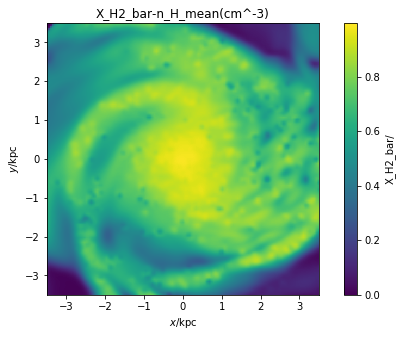

CPU times: user 19.1 s, sys: 2.68 s, total: 21.8 s
Wall time: 7.81 s


In [9]:
%%time
plt.figure(figsize=(9,5))
pynbody.plot.image(region.g, qty="X_H2_bar", width='7.0 kpc',
                   log=False, resolution=500, cmap="viridis", av_z="n_H_mean_arr",
                   vmin=min_H, vmax=max_H)
plt.title("X_H2_bar-n_H_mean(cm^-3)")
plt.savefig('outputs/3.5/X_H2_bar-n_H_mean-3.5.png', dpi=300, bbox_inches='tight')
plt.show()


/net/cephfs/home/mkrets/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in divide
  


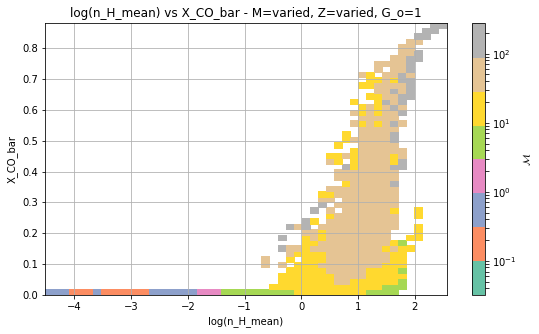

CPU times: user 1.05 s, sys: 24.6 ms, total: 1.08 s
Wall time: 1.06 s


In [10]:
%%time
plt.figure(figsize=(9,5))
histX_CO_M_mass, yedges, xedges = np.histogram2d(X_CO_bar, np.log10(n_H_mean_arr),
                               weights=mach_no_arr * region.gas["mass"], bins=50 , range=[[min_C,max_C],[min_n,max_n]])
histX_CO_mass, yedges, xedges = np.histogram2d(X_CO_bar, np.log10(n_H_mean_arr),
                               weights=region.gas["mass"], bins=50 , range=[[min_C,max_C],[min_n,max_n]])

yX_CO_M, xX_CO_M = yedges, xedges
plt.pcolormesh(xedges, yedges, histX_CO_M_mass/histX_CO_mass, norm=LogNorm(), vmin=min_M, vmax=max_M, cmap="Set2")
plt.colorbar(label=r"$\mathcal{M}$")
plt.xlabel('log(n_H_mean)')
plt.ylabel('X_CO_bar')
plt.grid(b=True, which='both', axis='both')
plt.title('log(n_H_mean) vs X_CO_bar - M=varied, Z=varied, G_o=1')
plt.savefig('outputs/3.5/Hist-X_CO_bar-n_H_mean-3.5.png', dpi=300, bbox_inches='tight')
plt.show()


/net/cephfs/home/mkrets/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in divide
  


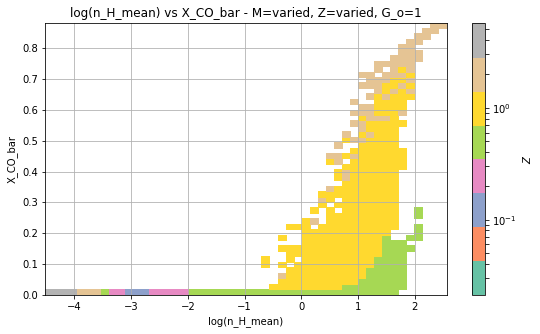

CPU times: user 900 ms, sys: 14.7 ms, total: 915 ms
Wall time: 916 ms


In [11]:
%%time
plt.figure(figsize=(9,5))
histX_CO_M_mass, yedges, xedges = np.histogram2d(X_CO_bar, np.log10(n_H_mean_arr),
                               weights=Z_arr * region.gas["mass"], bins=50 , range=[[min_C,max_C],[min_n,max_n]])
histX_CO_mass, yedges, xedges = np.histogram2d(X_CO_bar, np.log10(n_H_mean_arr),
                               weights=region.gas["mass"], bins=50 , range=[[min_C,max_C],[min_n,max_n]])

yX_CO_Z, xX_CO_Z = yedges, xedges
plt.pcolormesh(xedges, yedges, histX_CO_M_mass/histX_CO_mass, norm=LogNorm(), vmin=min_Z, vmax=max_Z, cmap="Set2")
plt.colorbar(label="$Z$")
plt.xlabel('log(n_H_mean)')
plt.ylabel('X_CO_bar')
plt.grid(b=True, which='both', axis='both')
plt.title('log(n_H_mean) vs X_CO_bar - M=varied, Z=varied, G_o=1')
plt.savefig('outputs/3.5/Hist-X_CO_bar-n_H_mean_Z-3.5.png', dpi=300, bbox_inches='tight')
plt.show()


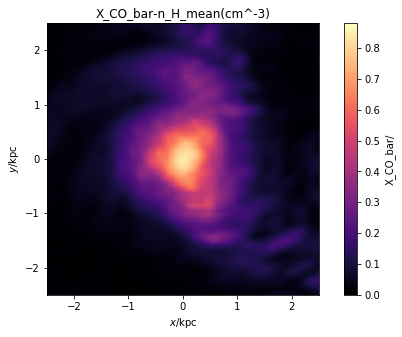

CPU times: user 18.8 s, sys: 2.27 s, total: 21.1 s
Wall time: 7.47 s


In [12]:
%%time
plt.figure(figsize=(9,5))
pynbody.plot.image(region.g, qty="X_CO_bar", width='5.0 kpc',
                   log=False, resolution=500, cmap="magma", av_z="n_H_mean_arr",
                   vmin=min_C, vmax=max_C)
plt.title("X_CO_bar-n_H_mean(cm^-3)")
plt.savefig('outputs/3.5/X_CO_bar-n_H_mean-3.5.png', dpi=300, bbox_inches='tight')
plt.show()


In [13]:
T = region.gas["temp"]

In [14]:
np.min(T)

SimArray(12.30890401, 'K')

In [15]:
np.max(T)

SimArray(3.7084053e+08, 'K')

In [16]:
np.min(Z_arr)

0.02126032056381756

In [17]:
np.max(Z_arr)

5.697329413104828

In [18]:
np.min(mach_no_arr)

0.032081150756892815

In [19]:
np.max(mach_no_arr)

277.59727041447553

In [20]:
mask = np.logical_and(X_H2_bar > 0.6, np.log10(n_H_mean_arr) < -2.0)

In [21]:
T[mask]

SimArray([], dtype=float64, 'K')

In [22]:
mach_no_arr[mask]

array([], dtype=float64)

In [13]:
X_H2_bar

array([0., 0., 0., ..., 0., 0., 0.])

In [14]:
min(X_H2_bar)

0.0

In [15]:
max(X_H2_bar)

0.9965042930692912